<a href="https://colab.research.google.com/github/nurimammasri/Dicoding-Machine-Learning-Pemula/blob/main/Latihan12-CNN%20Clean%20vs%20Messy%20Room.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Datasets :
[Github](https://github.com/nurimammasri/Dicoding-Machine-Learning-Pemula/blob/main/data/messy-vs-clean-room.zip) 
| [Kaggle](https://www.kaggle.com/nurimammasri/messy-vs-clean-room)

In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-09-26 11:11:39--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2021-09-26 11:11:39--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   230MB/s    in 0.3s    

2021-09-26 11:11:42 

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [ ]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
# train_datagen = ImageDataGenerator(
#                     rescale=1./255,
#                     rotation_range=20,
#                     horizontal_flip=True,
#                     shear_range = 0.2,
#                     fill_mode = 'nearest')

# test_datagen = ImageDataGenerator(
#                     rescale=1./255,
#                     rotation_range=20,
#                     horizontal_flip=True,
#                     shear_range = 0.2,
#                     fill_mode = 'nearest')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 34s - loss: 0.7845 - accuracy: 0.5000 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 2/25
25/25 - 1s - loss: 0.6931 - accuracy: 0.4500 - val_loss: 0.6907 - val_accuracy: 0.5500
Epoch 3/25
25/25 - 1s - loss: 0.7269 - accuracy: 0.5600 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/25
25/25 - 1s - loss: 0.6962 - accuracy: 0.4900 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 5/25
25/25 - 1s - loss: 0.7073 - accuracy: 0.4400 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/25
25/25 - 1s - loss: 0.6935 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/25
25/25 - 1s - loss: 0.6937 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/25
25/25 - 1s - loss: 0.6937 - accuracy: 0.4600 - val_loss: 0.6893 - val_accuracy: 0.5500
Epoch 9/25
25/25 - 1s - loss: 0.6972 - accuracy: 0.5800 - val_loss: 0.6804 - val_accuracy: 0.8500
Epoch 10/25
25/25 - 1s - loss: 0.6864 - accuracy: 0.5400 - val_loss: 0.5984 - val_accuracy: 0.6500
Epoch 11/25
25/25 

Saving How-To-Clean-A-Messy-Room.jpg to How-To-Clean-A-Messy-Room (1).jpg
How-To-Clean-A-Messy-Room.jpg
clean


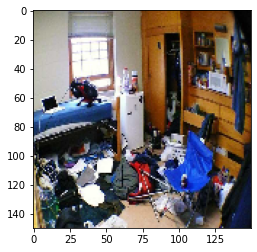

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')